# Pandas project:
# Are high populated countries more susceptible to shark attacks?

Shark attacks are a global phenomenon that usually increases alarm in coastal societies, often with negative outcomes for shark populations.

## Hypothesis:

Popular culture is flooded by the negative connotations of shark activity, however, is this specie attacks so common as we usually think? We would tend to think that the more people close to the water the attack tren may rise.

Let's check the data:

For this analysis we imported the data from [Kaggle on shark attacks incidents.](https://www.kaggle.com/teajay/global-shark-attacks/version/1#GSAF5.csv)

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib 

In [33]:
raw_df = pd.read_csv('GSAF5_uncleaned.csv', encoding='latin-1')
display(raw_df.head())
raw_df.shape

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


(5992, 24)

As we can see in the cell below, the data set its pretty messy when it comes to variable nomenclature and jargon use in several columns, for example in Species.

Therefore, we are proceding to clean the dataset step by step according to our main assumption:
1- We will use information related to time (month/year), country, location and fatality of attacks. We will also include type of species in order to check what's the trend on how different species agressivity may vary from one to ohters.

In [34]:
#Identify how many nulls you have for each variable
null_cols = raw_df.isnull().sum()

null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

We have identified that there are two columns that gives us no information: Unnamed: 22 and Unnamed: 23. 
We proceed to delete them:

We also proceed to delete the rest of the columns that are unnecessary for our study

In [35]:
unnammed_cols = raw_df[["Unnamed: 22","Unnamed: 23"]]
unnammed_cols.isnull().sum()


Unnamed: 22    5991
Unnamed: 23    5990
dtype: int64

In [36]:
unnammed_cols = raw_df.drop(columns=["Unnamed: 22","Unnamed: 23"])
raw_df2 = unnammed_cols
raw_df2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [37]:
data_clean = raw_df2.drop(columns=["Type", 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'])

For column of fatalities, we detected that there are necessary to fix some issues

In [38]:
data_clean['Fatal (Y/N)'].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
n             1
F             1
#VALUE!       1
N             1
Name: Fatal (Y/N), dtype: int64

The unknown and invalid values are unnecessary for the current analysis, therefore, we proceed to fix them:

In [39]:
data_clean['Fatal (Y/N)'].replace(['UNKNOWN', '#VALUE!', "F"], np.nan, inplace=True)
data_clean['Fatal (Y/N)'].replace([" N", "N ","n"], "N", inplace=True)
data_clean.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Fatal (Y/N)', 'Species '],
      dtype='object')

In [40]:
data_clean['Fatal (Y/N)'].value_counts()

N    4325
Y    1552
Name: Fatal (Y/N), dtype: int64

In [41]:
data_clean.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Fatal (Y/N)', 'Species '],
      dtype='object')

As we have interest in months case, we proceed to extract the month of attack from the "Date" column. For that purpose, we created a dictionary of the months that appears in the column and the output we want (as a numeric value).

In [42]:
data_clean['Date'].value_counts().head()

1957    11
1942     9
1956     8
1958     7
1941     7
Name: Date, dtype: int64

In [43]:
def findMonth (m):
    months = {
        "Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12
    }
    for month, numero in months.items(): 
        if month in m: 
            return numero
    return None

data_clean["Month"] = data_clean["Date"].apply(findMonth)


#As the function returns a float value, we change the type
data_clean["Month"]= data_clean["Month"].fillna(0).astype("int64")

In [44]:
display(data_clean.head())

,Case Number,Date,Year,Country,Area,Location,Fatal (Y/N),Species,Month
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,9
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,9
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,9
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,Thirteenth Beach,N,NaN,9
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,Bells Beach,N,2 m shark,9


After we applied this function, we continued to check null values through our dataframe. We also proceed to take out all 0 values as we take them as null too.

In [45]:
#Identify how many nulls you have for each variable
null_cols = data_clean.isnull().sum()

null_cols[null_cols > 0]

Country          43
Area            402
Location        496
Fatal (Y/N)     115
Species        2934
dtype: int64

In [46]:
data_clean.shape
data_clean.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Fatal (Y/N)', 'Species ', 'Month'],
      dtype='object')

In [47]:
data_clean2 = data_clean[data_clean["Month"] & data_clean["Year"] != 0].copy()
data_clean2.shape

(3793, 9)

As we considered Case Number the ref. number for each attack, we verified that we do not carried on with duplicates:

In [48]:
data_clean2['Case Number'] = data_clean.drop_duplicates(subset=['Case Number'], keep='first')
data_clean2.shape
data_clean2.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Fatal (Y/N)', 'Species ', 'Month'],
      dtype='object')

In [49]:
data_clean2.columns

Index(['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Fatal (Y/N)', 'Species ', 'Month'],
      dtype='object')

Now we proceed to clean the column Species. As the registers did not follow any criteria neither pattern, we created a dictionary, similar to the Month column methodology.

In [50]:
data_clean2["Species "].isnull()

pd.to_numeric(data_clean2["Species "], errors='coerce')

data_clean2 = data_clean2.dropna(subset=["Species "])

data_clean2["Species "] = data_clean2["Species "].astype(str)

In [51]:
def findSpecies (s):
    sharks = {
        "Bull":"Bull Shark", "bull":"Bull Shark", 
        "White":"White Shark", "white":"White Shark",
        "Tiger":"Tiger Shark", "tiger":"Tiger Shark",
        "Mako": "Mako Shark", "mako": "Mako Shark",
        "Blacktip": "Blacktip Shark", "blacktip": "Blacktip Shark",
        "Blue": "Blue Shark", "blue": "Blue Shark",
        "involvement": None, "involve": None, "Bronze":"Bronze Shark", "bronze":"Bronze Shark",
        "whaler":"Whale Shark"
    }
    for shark, species in sharks.items(): 
        if shark in s: 
            return species
    return "Other"

In [52]:
data_clean2["Cat_shark"] = data_clean2["Species "].apply(findSpecies)
data_clean2["Cat_shark"].value_counts()

Other             988
White Shark       439
Tiger Shark       183
Bull Shark        100
Blacktip Shark     66
Mako Shark         37
Bronze Shark       35
Blue Shark         28
Whale Shark         4
Name: Cat_shark, dtype: int64

In [53]:
data_clean2.columns
data_clean3 = data_clean2.drop(['Species ', "Date", "Location"], axis=1)

In [54]:
data_clean3.shape

(1985, 7)

In [55]:
display(data_clean3.head())

,Case Number,Year,Country,Area,Fatal (Y/N),Month,Cat_shark
103,2015.12.26,2015,SOUTH AFRICA,KwaZulu-Natal,N,12,White Shark
104,2015.12.25,2015,SPAIN,Grand Canary Island,N,12,Other
105,2015.12.22,2015,USA,Hawaii,N,12,Other
106,2015.12.21.b,2015,AUSTRALIA,New South Wales,N,12,Bronze Shark
107,2015.12.21.a,2015,BRAZIL,Pernambuco,N,12,Tiger Shark


Now we proceed to analyse the variance:

In [56]:
low_variance = []

for col in data_clean3._get_numeric_data():
    minimum = min(data_clean3[col])
    ninety_perc = np.percentile(data_clean3[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)


[]


There are no columns with low variance.

In [57]:
stats = data_clean3.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Year,1985.0,1982.607053,32.276273,1785.0,1963.0,1994.0,2008.0,2015.0,45.0
Month,1985.0,7.069018,3.251050,1.0,5.0,7.0,10.0,12.0,5.0


In [60]:
data_clean3.columns

Index(['Case Number', 'Year', 'Country', 'Area', 'Fatal (Y/N)', 'Month',
       'Cat_shark'],
      dtype='object')

### Test the hypotesis

In [65]:
import matplotlib as plt

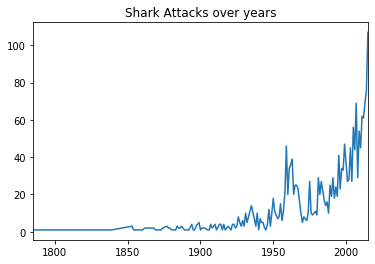

In [73]:
attaks_over_years = data_clean3['Year'].value_counts().sort_index()

%matplotlib inline
attaks_over_years.plot(title="Shark Attacks over years")

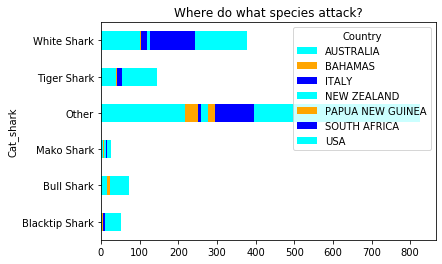

In [72]:
#Graph extracted from kaggle kernels - checking matplotlib
data_clean3.groupby("Cat_shark").filter(lambda x: len(x) > 35)\
  .groupby("Country").filter(lambda x: len(x) > 20)\
  .groupby(["Country","Cat_shark"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Where do what species attack?",stacked=True,color=['aqua','orange','blue'])

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
countries = {'CROATIA': 0, 'NORWAY': 0, 'FRANCE': 0, 'MARTINIQUE': 0, 'ICELAND': 0, 
            'JAVA': 1, 'Sierra Leone': 0, 'CYPRUS': 0, 'LIBERIA': 0, 'NEW BRITAIN': 1, 
            'URUGUAY': 1, 'NORTH ATLANTIC OCEAN ': 0, 'ADMIRALTY ISLANDS': 1, 
            'PAPUA NEW GUINEA': 1, 'DJIBOUTI': 0, 'TAIWAN': 1, 'EL SALVADOR': 0, 
            'ST. MAARTIN': 0, 'ASIA?': 0, 'NAMIBIA': 1, 'OCEAN': 1, 'CAPE VERDE': 0, 
            'MID ATLANTIC OCEAN': 0, 'MAURITIUS': 1, 'ANTIGUA': 0, 'FRENCH POLYNESIA': 1, 
            'JOHNSTON ISLAND': 0, 'SUDAN': 0, 'SOUTH KOREA': 0, 'TUVALU': 1, 
            'SOUTH ATLANTIC OCEAN': 1, 'UNITED ARAB EMIRATES (UAE)': 0, 'DOMINICAN REPUBLIC': 0, 
            ' PHILIPPINES': 0, 'MALAYSIA': 0, 'BRITISH VIRGIN ISLANDS': 0, 'CHINA': 0, 
            'ATLANTIC OCEAN': 0, 'ITALY': 0, 'VENEZUELA': 0, 'SOLOMON ISLANDS / VANUATU': 1, 
            'SOUTH CHINA SEA': 0, 'Between PORTUGAL & INDIA': 2, 'DIEGO GARCIA': 1, 
            'MEDITERRANEAN SEA?': 0, 'INDIAN OCEAN?': 1, 'INDIA': 0, 'SOUTH AFRICA': 1, 
            'St Helena': 1, 'WESTERN SAMOA': 1, 'TASMAN SEA': 1, 'HONG KONG': 0, 'TONGA': 1, 
            'YEMEN': 0, 'COLUMBIA': 0, 'NORTHERN MARIANA ISLANDS': 0, 'GUAM': 0, 'GUINEA': 0, 
            'CENTRAL PACIFIC': 2, 'GUATEMALA': 0, 'FIJI': 1, 'GULF OF ADEN': 0, 'JAPAN': 0, 
            'MID-PACIFC OCEAN': 0, 'ST. MARTIN': 1, 'USA': 0, 'CRETE': 0, 'BRAZIL': 1, 
            'TURKS & CAICOS': 0, 'SOUTHWEST PACIFIC OCEAN': 1, 'GREENLAND': 0, 
            'BAY OF BENGAL': 1, 'PACIFIC OCEAN': 0, 'LEBANON': 0, 'MALTA': 0, 'NIGERIA': 0, 
            'GREECE': 0, 'MEXICO': 0, 'BERMUDA': 0, 'UNITED KINGDOM': 0, 'SINGAPORE': 0, 
            'BRITISH ISLES': 0, 'TURKEY': 0, 'NEVIS': 1, 'AUSTRALIA': 1, 'ENGLAND': 0, 
            'SIERRA LEONE': 0, 'VANUATU': 1, 'NORTH SEA': 0, 'RUSSIA': 0, 'MICRONESIA': 0, 
            'PORTUGAL': 0, 'RED SEA': 0, 'MONTENEGRO': 0, 'IRAQ': 0, 'SWEDEN': 0, 
            'PERSIAN GULF': 0, 'NORTH ATLANTIC OCEAN': 0, 'Fiji': 1, 'SLOVENIA': 0, 
            'PHILIPPINES': 0, 'IRAN / IRAQ': 0, 'TUNISIA': 0, 'SAN DOMINGO': 1, 'AZORES': 0, 
            'GEORGIA': 0, 'BURMA': 0, 'NEW GUINEA': 1, 'SUDAN?': 0, 'NETHERLANDS ANTILLES': 0, 
            'ALGERIA': 0, 'NICARAGUA': 0, 'SEYCHELLES': 1, 'RED SEA?': 0, 'BRITISH NEW GUINEA': 1, 
            'THAILAND': 0, 'PALESTINIAN TERRITORIES': 0, 'FALKLAND ISLANDS': 1, 'IRELAND': 0, 
            'MONACO': 0, 'PARAGUAY': 1, 'SYRIA': 0, 'EGYPT ': 0, 'MADAGASCAR': 1, 
            'NORTH PACIFIC OCEAN': 0, 'EGYPT / ISRAEL': 0, 'COOK ISLANDS': 1, 
            'TRINIDAD & TOBAGO': 0, 'PACIFIC OCEAN ': 0, 'EQUATORIAL GUINEA / CAMEROON': 0, 
            'ISRAEL': 0, 'SAMOA': 1, 'ECUADOR': 1, 'CARIBBEAN SEA': 0, 'NEW CALEDONIA': 1, 
            'MARSHALL ISLANDS': 0, 'PANAMA': 0, 'UNITED ARAB EMIRATES': 0, 'ITALY / CROATIA': 0, 
            'NEW ZEALAND': 1, 'MALDIVE ISLANDS': 0, 'GHANA': 0, 'MOZAMBIQUE': 0, 'SRI LANKA': 0, 
            'SOLOMON ISLANDS': 1, 'Coast of AFRICA': 1, 'BARBADOS': 0, 'BANGLADESH': 0, 
            'CHILE': 1, 'CANADA': 0, 'HONDURAS': 0, 'PALAU': 0, 'AMERICAN SAMOA': 1, 
            'SAUDI ARABIA': 0, ' TONGA': 1, 'SPAIN': 0, 'ARGENTINA': 1, 'CURACAO': 0, 
            'ANDAMAN / NICOBAR ISLANDAS': 0, 'KENYA': 1, 'EGYPT': 0, 'THE BALKANS': 0, 
            'PUERTO RICO': 0, 'KIRIBATI': 0, 'OKINAWA': 0, 'REUNION': 1, 
            'BRITISH WEST INDIES': 0, 'NICARAGUA ': 0, 'FEDERATED STATES OF MICRONESIA': 0, 
            'IRAN': 0, 'CAYMAN ISLANDS': 0, 'SOMALIA': 0, 'INDONESIA': 1, 'KUWAIT': 0, 
            'Seychelles': 1, 'COSTA RICA': 0, 'INDIAN OCEAN': 1, 'CEYLON (SRI LANKA)': 0, 
            'YEMEN ': 0, 'HAITI': 0, 'SCOTLAND': 0, 'CUBA': 0, 'GUYANA': 0, 'LIBYA': 0, 
            'MEXICO ': 0, 'SENEGAL': 0, 'GRAND CAYMAN': 0, 'GABON': 1, 'GRENADA': 0, 
            'RED SEA / INDIAN OCEAN': 0, 'VIETNAM': 0, 'BAHAMAS': 0, 'BAHREIN': 0, 
            'NORTHERN ARABIAN SEA': 0, 'BELIZE': 0, 'MEDITERRANEAN SEA': 0, 'ANGOLA': 1, 
            'SOUTH PACIFIC OCEAN': 1, 'TANZANIA': 1, 'KOREA': 0, 'JAMAICA': 0, 'ARUBA': 0, 
            'MAYOTTE':1}

In [31]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.arange(year_mon[:,0].shape[0])
plt.figure(figsize=(15, 8))
plt.plot([], [], 'b', label='Northern Hemisphere', linewidth=10)
plt.plot([], [], 'r', label='Southern Hemisphere', linewidth=10)
plt.stackplot(x, year_mon[:,:2].sum(axis=1), year_mon[:,-2:].sum(axis=1), 
              colors=['b', 'r'])
plt.title('Attacks by hemispheres')
plt.legend(loc='best')
plt.ylabel('Attacks')
plt.axis([0, 11, 0, 600])
plt.xticks(x, months)
plt.show()

NameError: name 'year_mon' is not defined